# 1. First steps

Important libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

df = pd.concat([X, y], axis=1)
df.to_csv("dataset.csv")

# 2. Getting acquainted with data

- Categorical features:
   - *age*
   - *trestbps* - resting blood pressure /*mm Hg* (on admission to the hospital)
   - *chol* - serum cholesterol in *mg/dl*
   - *thalach* - Maximum heart rate achieved /*bps*
   - *oldpeak* -  ST depression induced by exercise relative to rest 
   - *ca* - Number of major vessels (0-3) colored by fluoroscopy

- Integer features:
   - *sex* 
       - 0: female
       - 1: male
   - *cp* - chest pain
       - 1: typical angina
       - 2: atypical angina
       - 3: non-anginal pain
       - 4: asymptomatic
   - *fbs* - fasting blood sugar > 120 mg/dl
       - 0: False
       - 1: True
   - *restecg* - Resting electrocardiographic results
       - 0: Normal
       - 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
       - 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
   - *exang* - Exercise induced angina
       - 0: No
       - 1: Yes
   - *slope* - The slope of the peak exercise ST segment
       - 1: Up sloping
       - 2: Flat
       - 3: Down sloping
   - *thal*
       - 3: Normal
       - 6: Fixed defect
       - 7: Reversible defect
- Label
    - *num* - The final diagnosis of heart disease (angiographic disease status)

##### The information was taken from:
Nassif A. (et al). 2018. Machine Learning Classifications of Coronary Artery Disease. DOI: 10.1109/iSAI-NLP.2018.8692942

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [7]:
# checking the number of missing values in each feature
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

In [8]:
# number of samples per class
df.num.value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

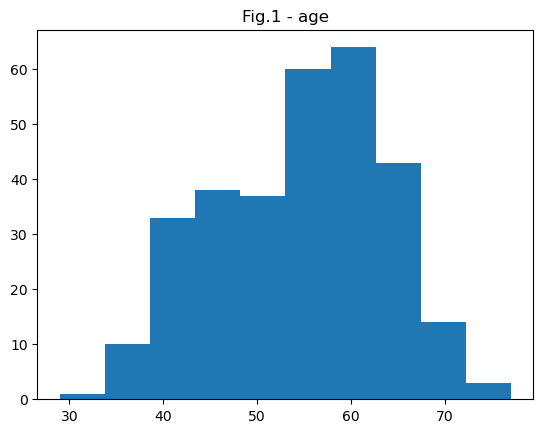

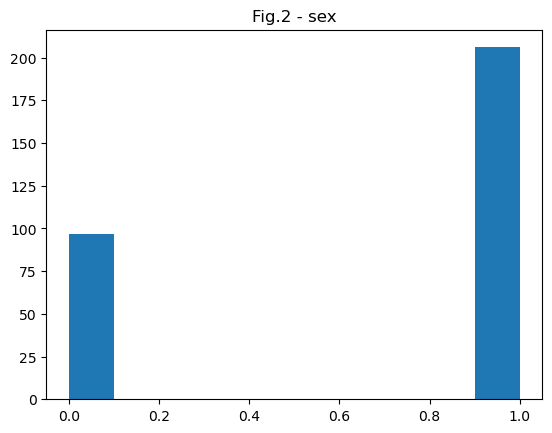

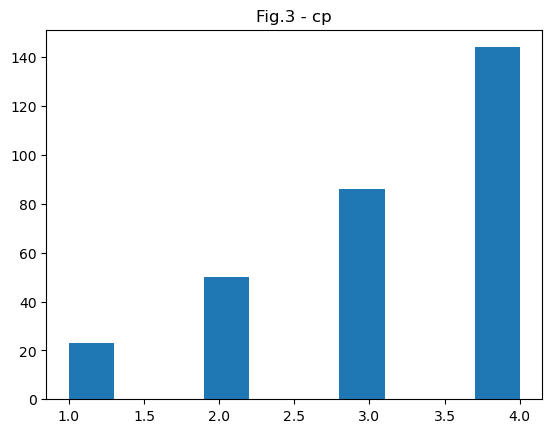

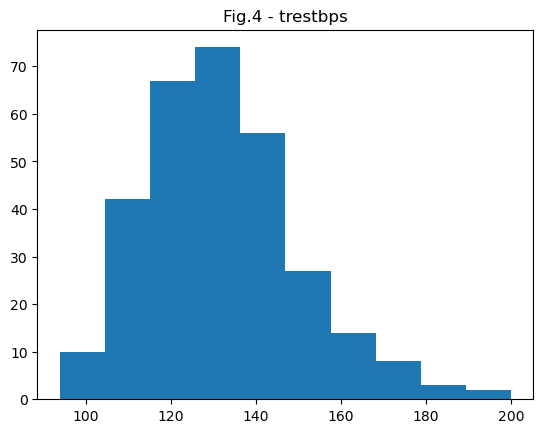

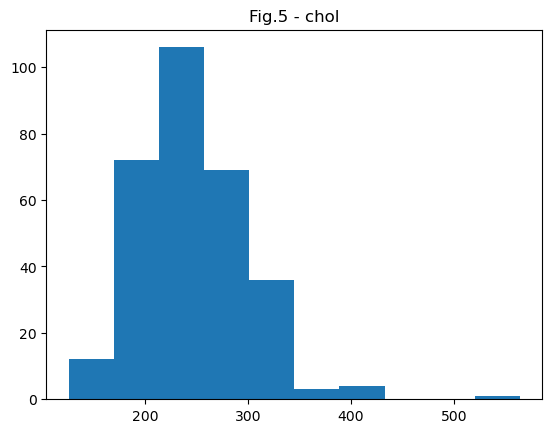

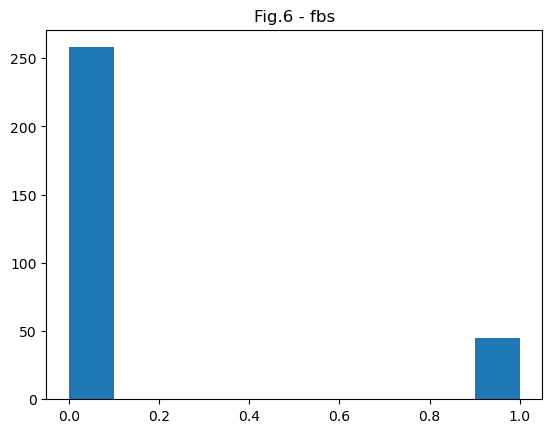

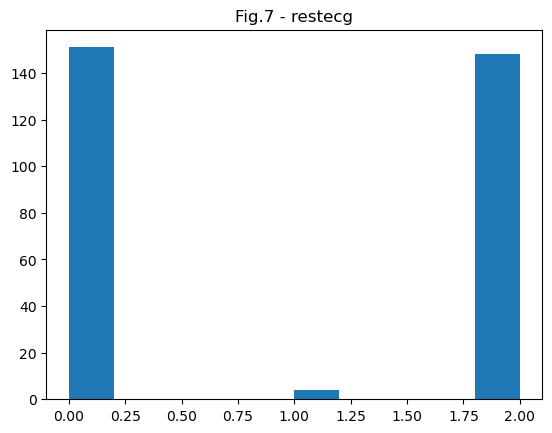

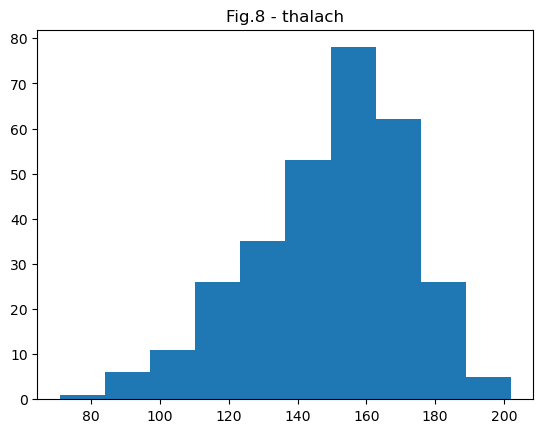

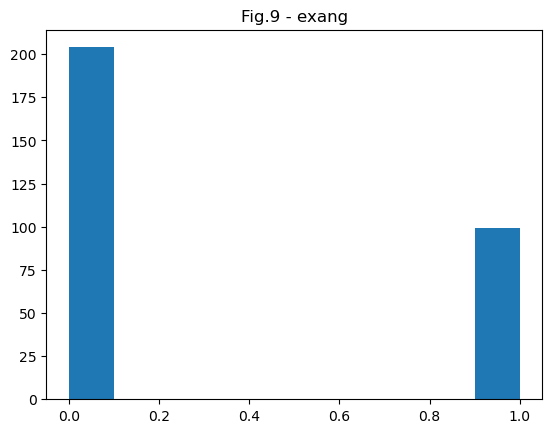

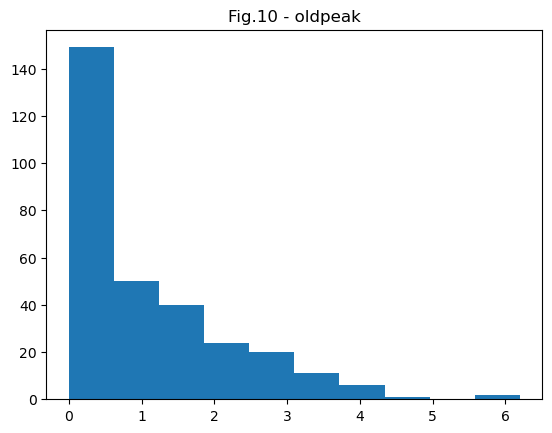

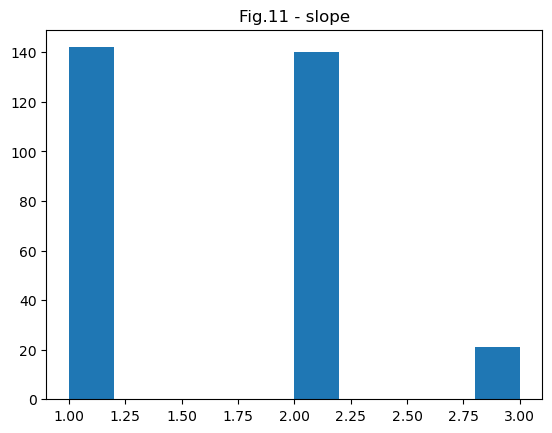

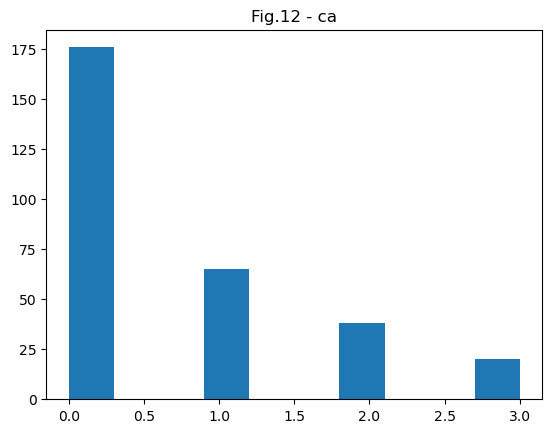

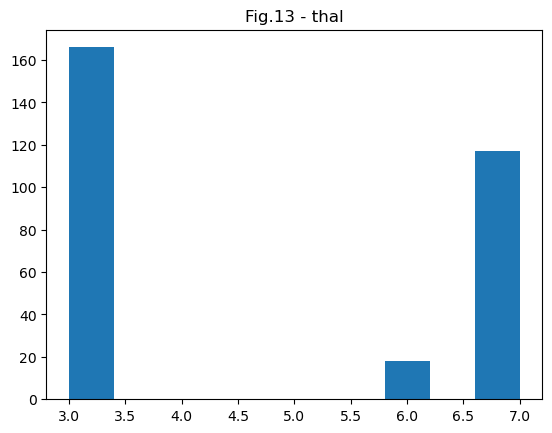

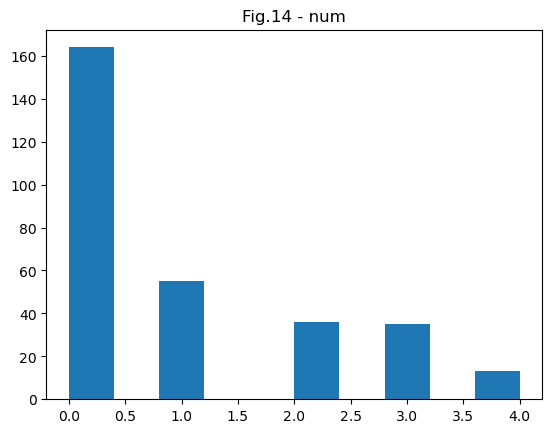

In [9]:
# histograms
n_fig = 1
for column in df.columns:
    plt.figure()
    plt.hist(df[column])
    plt.title("Fig."+str(n_fig)+" - "+column)
    n_fig += 1

# 3. Breaf data cleaning

Data is already pretty clean, and there are only 6 NaN values, so we can drop those observations.

### 3.1 Dropping NaN values

In [10]:
df = df.dropna()

# re-checking the number of samples per class adfer dropping missing values
df.num.value_counts()

num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

- As we can see, the NaN values were part of the classes with more observations, therefore droppins NaN values does not worsen the class imbalance problem.
- Since we only have 13 samples from the class with least amount of samples (y = 4), we cannot afford taking some samples as testing set, because we would loose valuable information. Therefore, we are going to work only with training and validation sets.

### 3.2 Separating a dataset for testing (*client data*)

The traditional approach for splitting the dataset into train+validation+test is 60%+20%+20%

In [11]:
# dataset to be reserved for future testing (client role)
# making sure we have 20% from every class
client_set = df.copy().groupby('num').apply(lambda Class: Class.sample(frac = 0.20))
client_set.index = client_set.index.droplevel(0)

# new data frame for creaing and testing models
df_filtered = df.copy().drop(client_set.index)

# reseting indices
client_set = client_set.reset_index(drop=True)
df_filtered = df_filtered.reset_index(drop=True)

(array([32.,  0., 11.,  0.,  0.,  7.,  0.,  7.,  0.,  3.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

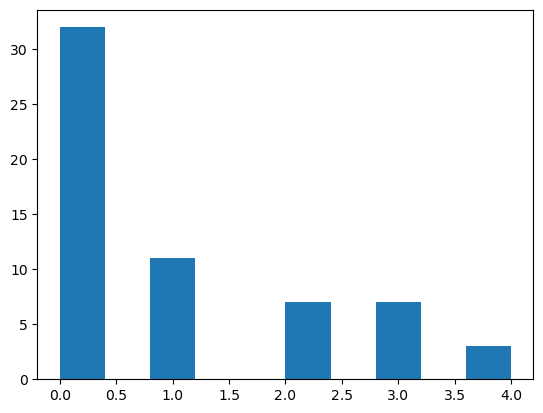

In [12]:
plt.hist(client_set.num)

# 4. Class imbalance

As seen in the histogram of Fig. 14, there are many more samples with label 0 than with other labels. Therefore, class imbalance has to be dealt with. According to Hoffman [1], there are several ways to reduce class imbalance, such as using other performance metrics when assessing performance (precision, recall, F1 score, and confusion matrix), performing over-sampling (when the dataset is reletively small), or using the Synthetic Minority Over-sampling Technique (SMOTE) algorithm to create synthetic samples.
</br> 
BUT, according to this video https://www.youtube.com/watch?v=adHqzek--d0, on stamp 3:52, the SMOTE technique is not good for multidimensional data (which is the one we have here)

REFERENCE [1]: K. Hoffman. *Machine Learning: How to Handle Class Imbalance*. Analytics Vidhya. February 13, 2021.

### 4.1 Oversampling by doubling classes different from 0

This method might create oversampling.

In [13]:
# Simple oversampling of classes 1, 2, 3 and 4 (simply doubling the samples)
def oversampling_double(dataframe):   
    """
    This function doubles the number of samples with labels 1, 2, 3, 4
    """
    for i in [1, 2, 3, 4]:
        df_add = dataframe[dataframe['num']==i]
        dataframe = pd.concat([dataframe, df_add], axis=0)

    # Restarting indices
    dataframe = dataframe.reset_index(drop=True)
    
    return dataframe

### 4.2 Oversampling through SMOTE

In [14]:
# pip install imblearn

def oversampling_smote(dataframe):
    """
    This function oversamples a dataset with the Synthetic Minority 
    Over-sampling Technique
    """
    from imblearn.over_sampling import SMOTE
    
    smote = SMOTE(random_state = 42)
    X, y = smote.fit_resample(dataframe.drop(columns='num'), dataframe['num'])
    y = pd.Series(data = y, name = 'num')
    df_smote = pd.concat([X, y], axis = 1, join = 'inner')
    
    return df_smote

# 5. Data selection

### 5.1 Defining the oversampling method

In [15]:
# splitting into features (X) and labels (y)

oversampling_method = input("Oversampling method (DOUBLING or SMOTE): ")

if oversampling_method == "DOUBLING":
    X = oversampling_double(df_filtered).drop(columns=['num'])
    y = oversampling_double(df_filtered).num

elif oversampling_method == "SMOTE":
    X = oversampling_smote(df_filtered).drop(columns=['num'])
    y = oversampling_smote(df_filtered).num 

### 5.2 Feature selection 

##### 5.2.1 Features selection by correlation elimination

We are using Spearman's correlation instead of Pearson's because practically all features don't have a normal distribution (as seen in the histograms above) and Spearman's is more robust to outliers.

Nassif et al. (2018; 10.1109/iSAI-NLP.2018.8692942) also applied correlation evaluation, but did not use Spearman's correlation.

In [16]:
corr = X.corr(method='spearman')
abs(corr)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,0.114768,0.136961,0.291018,0.155054,0.128701,0.162636,0.307292,0.084798,0.181807,0.140050,0.373123,0.024985
sex,0.114768,1.000000,0.057079,0.110957,0.181665,0.009624,0.001527,0.109109,0.152928,0.135134,0.067433,0.130600,0.340099
cp,0.136961,0.057079,1.000000,0.000440,0.053318,0.107956,0.087324,0.458069,0.453741,0.251723,0.227702,0.243915,0.305144
trestbps,0.291018,0.110957,0.000440,1.000000,0.171285,0.084120,0.150502,0.028367,0.078829,0.136803,0.110172,0.053704,0.088661
chol,0.155054,0.181665,0.053318,0.171285,1.000000,0.049989,0.136271,0.035477,0.098037,0.001513,0.000342,0.070159,0.014599
fbs,0.128701,0.009624,0.107956,0.084120,0.049989,1.000000,0.084246,0.029962,0.032510,0.014096,0.033232,0.100206,0.027784
restecg,0.162636,0.001527,0.087324,0.150502,0.136271,0.084246,1.000000,0.033627,0.041414,0.101842,0.054568,0.125825,0.052300
thalach,0.307292,0.109109,0.458069,0.028367,0.035477,0.029962,0.033627,1.000000,0.430522,0.448983,0.450724,0.291125,0.246199
exang,0.084798,0.152928,0.453741,0.078829,0.098037,0.032510,0.041414,0.430522,1.000000,0.285399,0.270407,0.151054,0.338248
oldpeak,0.181807,0.135134,0.251723,0.136803,0.001513,0.014096,0.101842,0.448983,0.285399,1.000000,0.613046,0.224453,0.366811


Creating a function that selects features according correlation. The arguments of the function (1) the dataframe, (2) the correlation method, and (3) the correlation threshold for feature elimination.

In [17]:
def Corr_selection(df, corr_method, threshold):
    """
    This function selects the features to be eliminate according to 
    a correlation threshold
    
    corr_matrix: has to be a pandas data frame n-by-n,
    with n features as indices and columns.
    threshold: has to by a int or float from 0 to 1
    """
    corr_matrix = X.corr(method=corr_method)
    # covert corr_matrix to absolute values
    corr_matrix = np.array(abs(corr_matrix))
    # all features available
    features = np.array(df.columns)
    
    # list of features to eliminate
    to_eliminate = []
    
    # runs all lines
    for i in range(len(features)):
        # runs all columns
        for j in range(len(features)):
            
            if corr_matrix[i,j] > threshold and corr_matrix[i,j] != 1: 
                
                if np.mean(corr_matrix[i,:]) > np.mean(corr_matrix[:,j]):
                    to_eliminate.append(features[i])
                else:
                    to_eliminate.append(features[j])
    
    to_eliminate = np.unique(to_eliminate)
    selected_features = list( features[~np.isin(features, to_eliminate)] )
    
    return selected_features

##### 5.2.2 Features selection by information gain

Creating a function that selects features according to Mutual Information Gain. 

References:
- Nassif et al. (2018; 10.1109/iSAI-NLP.2018.8692942)
- Guhanesvar. *Feature Selection Based on Mutual Information Gain for Classification and Regression*. Medium. June 26, 2021.

In [18]:
def InfoGain_selection(X, y, n_features):
    """
    This function selects n_features according that have the greatest 
    mutual information classification
    """
    from sklearn.feature_selection import mutual_info_classif
    importance = mutual_info_classif(X, y)
    importance = pd.Series(data = importance, index = X.columns)
    importance = importance.sort_values(ascending=False)

    selected_features = list(importance.iloc[:n_features].index)
    
    return importance, selected_features

Text(0, 0.5, 'Mutual Information Gain')

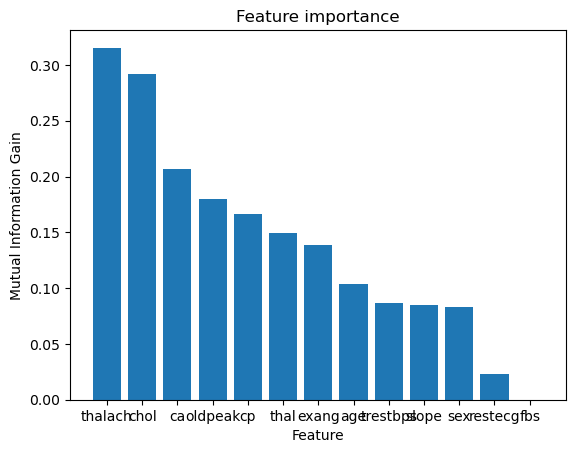

In [19]:
importance, InfoGain_selected_features = InfoGain_selection(X, y, 6)

plt.figure()
plt.bar(importance.index, importance)
plt.title("Feature importance")
plt.xlabel("Feature")
plt.ylabel("Mutual Information Gain")

##### 5.2.3 Data selection by permutations (3 features)

In [20]:
feat3_permutations = pd.DataFrame(columns = ['feature1', 'feature2', 'feature3'])

ind = 0
for feature1 in X.columns:
    for feature2 in X.columns:
        for feature3 in X.columns:
            sample = pd.DataFrame({'feature1':feature1, 'feature2':feature2, 'feature3':feature3}, index = [ind])
            feat3_permutations = pd.concat([feat3_permutations, sample])
            ind += 1

# 6. Creating models

Here the goal is to classify the final diagnosis of heart disease according to [0, 1, 2, 3, 4], which is opposite to what literature does: they reduce the classification to binary.

### 6.1 Decision Tree

With a Decision Tree algorithm there is no need to standardize the data, these algorithms are not influenced by variance.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

##### 6.1.1 ... with all features

In [22]:
# separating train and test sets (20% out of the 80% after splitting the clients dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20/0.80, random_state=42)

# given parameters to search for the best (grid search)
parameters_grid = {'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 3, 4, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

# finding the best parameters for the model 
grid_search = GridSearchCV(estimator = tree.DecisionTreeClassifier(), 
                           param_grid = parameters_grid, 
                           cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

# display the best parameters
best_parameters = grid_search.best_params_

# display first best parameter 
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_parameters)
print("Best Estimator:", best_estimator)

# creating and fitting the model
classifier = tree.DecisionTreeClassifier(**best_parameters) 
classifier = classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

# accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_predict)

print("Oversampling method:", oversampling_method)
print("Decision Tree model, all features")
print("Accuracy:", accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=20)
Oversampling method: DOUBLING
Decision Tree model, all features
Accuracy: 0.8160919540229885


##### 6.1.2 ... with correlation feature selection

In [23]:
# selected features
corr_selected_features = Corr_selection(X, 'spearman', 0.2)

# separating train and test sets (20% out of the 80% after splitting the clients dataset)
X_train, X_test, y_train, y_test = train_test_split(X[corr_selected_features], 
                                                    y, test_size=0.20/0.80, 
                                                    random_state=42)

# given parameters to search for the best (grid search)
parameters_grid = {'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 3, 4, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

# finding the best parameters for the model 
grid_search = GridSearchCV(estimator = tree.DecisionTreeClassifier(), 
                           param_grid = parameters_grid, 
                           cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

# display the best parameters
best_parameters = grid_search.best_params_

# display first best parameter 
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_parameters)
print("Best Estimator:", best_estimator)

# creating and fitting the model
classifier = tree.DecisionTreeClassifier(**best_parameters) 
classifier = classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

# accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_predict)

print("Oversampling method:", oversampling_method)
print("Decision Tree model, correlation selection")
print("Accuracy:", accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=20)
Oversampling method: DOUBLING
Decision Tree model, correlation selection
Accuracy: 0.8160919540229885


##### 6.1.3 ... with Multual Information Feature selection

In [24]:
# selected features
InfoGain_selected_features = InfoGain_selection(X, y, 6)[1]

# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X[InfoGain_selected_features], y, 
                                                    test_size=0.20, random_state=42)

# given parameters to search for the best (grid search)
parameters_grid = {'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 3, 4, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

# finding the best parameters for the model 
grid_search = GridSearchCV(estimator = tree.DecisionTreeClassifier(), 
                           param_grid = parameters_grid, 
                           cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

# display the best parameters
best_parameters = grid_search.best_params_

# display first best parameter 
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_parameters)
print("Best Estimator:", best_estimator)

# creating and fitting the model
classifier = tree.DecisionTreeClassifier(**best_parameters) 
classifier = classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

# accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_predict)

print("Oversampling method:", oversampling_method)
print("Decision Tree model, InfoGain selection")
print("Accuracy:", accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Estimator: DecisionTreeClassifier(criterion='entropy')
Oversampling method: DOUBLING
Decision Tree model, InfoGain selection
Accuracy: 0.8428571428571429


##### 6.1.4 ... with by-3-permutation selection

In [25]:
accuracy_permutation = []

for n in range(len(feat3_permutations)):
    
    X_train, X_test, y_train, y_test = train_test_split(X[feat3_permutations.iloc[n,:]], y, 
                                                    test_size=0.20, random_state=42 )
    
    """
    here we cannot afford a grid search because of the many interations
    therefore, we choose to set the parameters of the model to default
    """
    
    classifier = tree.DecisionTreeClassifier()
    classifier = classifier.fit(X_train, y_train)
    y_predict = classifier.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_predict)

    accuracy_permutation.append(accuracy)

accuracy_permutation = pd.Series(data = accuracy_permutation, name="accuracy")
feat3_models = pd.concat([feat3_permutations, accuracy_permutation], axis=1)

In [26]:
print("Oversampling method:", oversampling_method)
display(feat3_models.sort_values(by='accuracy', ascending = False).head(10))

Oversampling method: DOUBLING


,feature1,feature2,feature3,accuracy
1246,thalach,chol,ca,0.857143
2123,thal,thalach,chol,0.857143
826,chol,ca,thalach,0.857143
1330,thalach,ca,chol,0.857143
779,chol,thalach,thal,0.857143
778,chol,thalach,ca,0.857143
568,trestbps,chol,oldpeak,0.842857
1343,thalach,thal,chol,0.842857
1247,thalach,chol,thal,0.842857
796,chol,oldpeak,trestbps,0.842857


Text(0.5, 0, 'chol')

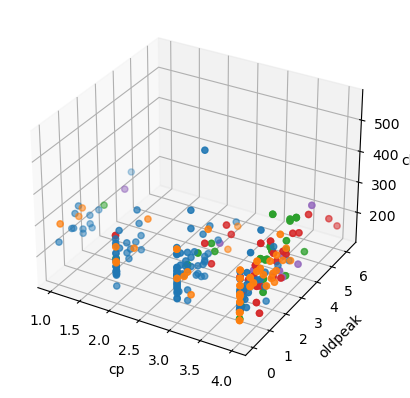

In [27]:
zero  = (y==0)
one   = (y==1)
two   = (y==2)
three = (y==3)
four  = (y==4)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X['cp'][zero],   X['oldpeak'][zero],   X['chol'][zero])
ax.scatter(X['cp'][one],   X['oldpeak'][one],   X['chol'][one])
ax.scatter(X['cp'][two],   X['oldpeak'][two],   X['chol'][two])
ax.scatter(X['cp'][three], X['oldpeak'][three], X['chol'][three])
ax.scatter(X['cp'][four],  X['oldpeak'][four],  X['chol'][four])

ax.set_xlabel('cp')
ax.set_ylabel('oldpeak')
ax.set_zlabel('chol')

### 6.2 Support Vector Machine (SVM)

The **SVM** is an algorithm mostly used for classification, such as our case study. Check [[2]](#2) for a better understanding.

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

##### 6.2.1 ... with all features

In [29]:
# separating train and test sets (20% out of the 80% after splitting the clients dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20/0.80, random_state=42)

y_client = client_set['num']
X_client = client_set.drop(['num'], axis=1)

norm = Normalizer()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)
X_client_norm = norm.transform(X_client)

# given parameters to search for the best (grid search)
parameters_grid = {'kernel': ['rbf', 'linear', 'sigmoid'],
    'gamma': [1e-2, 1e-3, 1e-4],
    'C': [1, 10, 100, 1000]}

# finding the best parameters for the model 
grid_search = GridSearchCV(estimator = SVC(), 
                           param_grid = parameters_grid, 
                           cv = 5, scoring = 'accuracy')
grid_search.fit(X_train_norm, y_train)

# display the best parameters
best_parameters = grid_search.best_params_

# display first best parameter 
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_parameters)
print("Best Estimator:", best_estimator)

# creating and fitting the model
classifier = SVC(**best_parameters) 
classifier = classifier.fit(X_train_norm, y_train)
y_predict = classifier.predict(X_test_norm)
y_predict_train = classifier.predict(X_train_norm)
y_predict_client = classifier.predict(X_client_norm)

print("Oversampling method:", oversampling_method)
print("KNN, no feature selection")
print("Accuracy test:", metrics.accuracy_score(y_test, y_predict))
print("Accuracy train:", metrics.accuracy_score(y_train, y_predict_train))
print("Accuracy client:", metrics.accuracy_score(y_client, y_predict_client))

Best Parameters: {'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}
Best Estimator: SVC(C=1000, gamma=0.01, kernel='linear')
Oversampling method: DOUBLING
KNN, no feature selection
Accuracy test: 0.4827586206896552
Accuracy train: 0.5328185328185329
Accuracy client: 0.5833333333333334


##### 6.2.2 ... with correlation feature selection

In [31]:
# selected features
corr_selected_features = Corr_selection(X, 'spearman', 0.2)

# separating train and test sets (20% out of the 80% after splitting the clients dataset)
X_train, X_test, y_train, y_test = train_test_split(X[corr_selected_features], 
                                                    y, test_size=0.20/0.80, 
                                                    random_state=42)

norm = Normalizer()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)
X_client_norm = norm.transform(X_client[corr_selected_features])

# given parameters to search for the best (grid search)
parameters_grid = {'kernel': ['rbf', 'linear', 'sigmoid'],
    'gamma': [1e-2, 1e-3, 1e-4],
    'C': [1, 10, 100, 1000]}

# finding the best parameters for the model 
grid_search = GridSearchCV(estimator = SVC(), 
                           param_grid = parameters_grid, 
                           cv = 5, scoring = 'accuracy')
grid_search.fit(X_train_norm, y_train)

# display the best parameters
best_parameters = grid_search.best_params_

# display first best parameter 
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_parameters)
print("Best Estimator:", best_estimator)

# creating and fitting the model
classifier = SVC(**best_parameters) 
classifier = classifier.fit(X_train_norm, y_train)
y_predict = classifier.predict(X_test_norm)
y_predict_train = classifier.predict(X_train_norm)
y_predict_client = classifier.predict(X_client_norm)

print("Oversampling method:", oversampling_method)
print("KNN, correlation selection")
print("Accuracy test:", metrics.accuracy_score(y_test, y_predict))
print("Accuracy train:", metrics.accuracy_score(y_train, y_predict_train))
print("Accuracy client:", metrics.accuracy_score(y_client, y_predict_client))

Best Parameters: {'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}
Best Estimator: SVC(C=1000, gamma=0.01, kernel='linear')
Oversampling method: DOUBLING
KNN, correlation selection
Accuracy test: 0.45977011494252873
Accuracy train: 0.3667953667953668
Accuracy client: 0.5166666666666667


##### 6.2.3 ... with Multual Information Feature selection

In [32]:
# selected features
InfoGain_selected_features = InfoGain_selection(X, y, 6)[1]

# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X[InfoGain_selected_features], y, 
                                                    test_size=0.20, random_state=42)

norm = Normalizer()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)
X_client_norm = norm.transform(X_client[InfoGain_selected_features])

# given parameters to search for the best (grid search)
parameters_grid = {'kernel': ['rbf', 'linear', 'sigmoid'],
    'gamma': [1e-2, 1e-3, 1e-4],
    'C': [1, 10, 100, 1000]}

# finding the best parameters for the model 
grid_search = GridSearchCV(estimator = SVC(), 
                           param_grid = parameters_grid, 
                           cv = 5, scoring = 'accuracy')
grid_search.fit(X_train_norm, y_train)

# display the best parameters
best_parameters = grid_search.best_params_

# display first best parameter 
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_parameters)
print("Best Estimator:", best_estimator)

# creating and fitting the model
classifier = SVC(**best_parameters) 
classifier = classifier.fit(X_train_norm, y_train)
y_predict = classifier.predict(X_test_norm)
y_predict_train = classifier.predict(X_train_norm)
y_predict_client = classifier.predict(X_client_norm)

print("Oversampling method:", oversampling_method)
print("KNN, Multual Information Feature selection")
print("Accuracy test:", metrics.accuracy_score(y_test, y_predict))
print("Accuracy train:", metrics.accuracy_score(y_train, y_predict_train))
print("Accuracy client:", metrics.accuracy_score(y_client, y_predict_client))

Best Parameters: {'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}
Best Estimator: SVC(C=1000, gamma=0.01, kernel='linear')
Oversampling method: DOUBLING
KNN, Multual Information Feature selection
Accuracy test: 0.5142857142857142
Accuracy train: 0.48188405797101447
Accuracy client: 0.5666666666666667


##### 6.2.4 ... with by-3-permutation selection

In [33]:
accuracy_permutation_test = []
accuracy_permutation_train = []
accuracy_permutation_client = []
best_parameters_list = []

for n in range(len(feat3_permutations)):
    
    X_train, X_test, y_train, y_test = train_test_split(X[feat3_permutations.iloc[n,:]], y, 
                                                    test_size=0.20, random_state=42 )
    
    norm = Normalizer()
    X_train_norm = norm.fit_transform(X_train)
    X_test_norm = norm.transform(X_test)
    X_client_norm = norm.transform(X_client[feat3_permutations.iloc[n,:]])
    # given parameters to search for the best (grid search)
    #parameters_grid = {'kernel': ['rbf', 'linear', 'sigmoid'],
    #    'gamma': [1e-2, 1e-3, 1e-4],
    #    'C': [1, 10, 100, 1000]}
    # finding the best parameters for the model 
    #grid_search = GridSearchCV(estimator = SVC(), 
    #                        param_grid = parameters_grid, 
    #                        cv = 5, scoring = 'accuracy')
    #grid_search.fit(X_train_norm, y_train)
    
    """
    here we cannot afford a grid search because of the many interations
    therefore, we choose to set the parameters of the model to default
    """
    
    # display the best parameters
    #best_parameters = grid_search.best_params_

    # display first best parameter 
    #best_estimator = grid_search.best_estimator_

    #print("Best Parameters:", best_parameters)
    #print("Best Estimator:", best_estimator)

    # creating and fitting the model
    classifier = SVC(**best_parameters)
    classifier = classifier.fit(X_train_norm, y_train)
    y_predict = classifier.predict(X_test_norm)
    y_predict_train = classifier.predict(X_train_norm)
    y_client_train = classifier.predict(X_client_norm)

    # accuracy of the model
    accuracy = metrics.accuracy_score(y_test, y_predict)
    
    best_parameters_list.append(best_parameters)
    accuracy_permutation_test.append(metrics.accuracy_score(y_test, y_predict))
    accuracy_permutation_train.append(metrics.accuracy_score(y_train, y_predict_train))
    accuracy_permutation_client.append(metrics.accuracy_score(y_client, y_client_train))

accuracy_permutation_test = pd.Series(data = accuracy_permutation_test, name="accuracy_test")
accuracy_permutation_train = pd.Series(data = accuracy_permutation_train, name="accuracy_train")
accuracy_permutation_client = pd.Series(data = accuracy_permutation_client, name="accuracy_client")
best_parameters_list = pd.Series(data = best_parameters_list, name="paramenters")
feat3_models = pd.concat([feat3_permutations, accuracy_permutation_test, accuracy_permutation_train, accuracy_permutation_client, best_parameters_list], axis=1)

In [34]:
print("Oversampling method:", oversampling_method)
display(feat3_models.sort_values(by=['accuracy_test', 'accuracy_train', 'accuracy_client'], ascending = False).head(10))

Oversampling method: DOUBLING


,feature1,feature2,feature3,accuracy_test,accuracy_train,accuracy_client,paramenters
1323,thalach,slope,slope,0.557143,0.402174,0.483333,"{'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}"
1791,slope,thalach,slope,0.557143,0.402174,0.483333,"{'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}"
1827,slope,slope,thalach,0.557143,0.402174,0.483333,"{'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}"
297,sex,oldpeak,ca,0.542857,0.481884,0.600000,"{'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}"
321,sex,ca,oldpeak,0.542857,0.481884,0.600000,"{'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}"
1545,oldpeak,sex,ca,0.542857,0.481884,0.600000,"{'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}"
1665,oldpeak,ca,sex,0.542857,0.481884,0.600000,"{'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}"
1881,ca,sex,oldpeak,0.542857,0.481884,0.600000,"{'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}"
1977,ca,oldpeak,sex,0.542857,0.481884,0.600000,"{'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}"
437,cp,thalach,exang,0.542857,0.434783,0.550000,"{'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}"


Text(0.5, 0, 'exang')

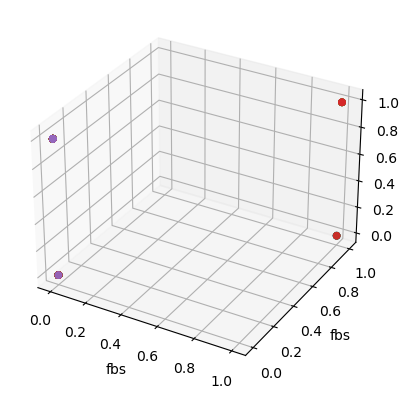

In [35]:
zero  = (y==0)
one   = (y==1)
two   = (y==2)
three = (y==3)
four  = (y==4)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X['fbs'][zero],   X['fbs'][zero],   X['exang'][zero])
ax.scatter(X['fbs'][one],   X['fbs'][one],   X['exang'][one])
ax.scatter(X['fbs'][two],   X['fbs'][two],   X['exang'][two])
ax.scatter(X['fbs'][three], X['fbs'][three], X['exang'][three])
ax.scatter(X['fbs'][four],  X['fbs'][four],  X['exang'][four])

ax.set_xlabel('fbs')
ax.set_ylabel('fbs')
ax.set_zlabel('exang')

### 6.3 K-Nearest-Neighbour - Algorithm (KNN)

The **KNN** is an algorithm used for classification ot estimate the class that the new data point will be.

##### 6.3.1 ... with all features

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# separating train and test sets (20% out of the 80% after splitting the clients dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20/0.80, random_state=42)

norm = Normalizer()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)
X_client_norm = norm.transform(X_client)

# given parameters to search for the best (grid search)
parameters_grid = {'metric': ['euclidean', 'cityblock', 'chebyshev'],
    'n_neighbors': [1, 2, 3, 4]}

# finding the best parameters for the model 
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), 
                           param_grid = parameters_grid, 
                           cv = 5, scoring = 'accuracy')
grid_search.fit(X_train_norm, y_train)

# display the best parameters
best_parameters = grid_search.best_params_

# display first best parameter 
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_parameters)
print("Best Estimator:", best_estimator)

# creating and fitting the model
classifier = KNeighborsClassifier(**best_parameters)
classifier = classifier.fit(X_train_norm, y_train)
y_predict = classifier.predict(X_test_norm)
y_predict_train = classifier.predict(X_train_norm)
y_predict_client = classifier.predict(X_client_norm)

print("Oversampling method:", oversampling_method)
print("KNN, no fetaure selection")
print("Accuracy test:", metrics.accuracy_score(y_test, y_predict))
print("Accuracy train:", metrics.accuracy_score(y_train, y_predict_train))
print("Accuracy client:", metrics.accuracy_score(y_client, y_predict_client))

Best Parameters: {'metric': 'cityblock', 'n_neighbors': 1}
Best Estimator: KNeighborsClassifier(metric='cityblock', n_neighbors=1)
Oversampling method: DOUBLING
KNN, no fetaure selection
Accuracy test: 0.7931034482758621
Accuracy train: 1.0
Accuracy client: 0.5


##### 6.3.2 ... with correlation feature selection

In [37]:
# selected features
corr_selected_features = Corr_selection(X, 'spearman', 0.2)

# separating train and test sets (20% out of the 80% after splitting the clients dataset)
X_train, X_test, y_train, y_test = train_test_split(X[corr_selected_features], 
                                                    y, test_size=0.20/0.80, 
                                                    random_state=42)

norm = Normalizer()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)
X_client_norm = norm.transform(X_client[corr_selected_features])

# given parameters to search for the best (grid search)
parameters_grid = {'metric': ['euclidean', 'cityblock', 'chebyshev'],
    'n_neighbors': [1, 2, 3, 4]}

# finding the best parameters for the model 
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), 
                           param_grid = parameters_grid, 
                           cv = 5, scoring = 'accuracy')
grid_search.fit(X_train_norm, y_train)

# display the best parameters
best_parameters = grid_search.best_params_

# display first best parameter 
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_parameters)
print("Best Estimator:", best_estimator)

# creating and fitting the model
classifier = KNeighborsClassifier(**best_parameters)
classifier = classifier.fit(X_train_norm, y_train)
y_predict = classifier.predict(X_test_norm)
y_predict_train = classifier.predict(X_train_norm)
y_predict_client = classifier.predict(X_client_norm)

print("Oversampling method:", oversampling_method)
print("KNN, correlation selection")
print("Accuracy test:", metrics.accuracy_score(y_test, y_predict))
print("Accuracy train:", metrics.accuracy_score(y_train, y_predict_train))
print("Accuracy client:", metrics.accuracy_score(y_client, y_predict_client))

Best Parameters: {'metric': 'cityblock', 'n_neighbors': 1}
Best Estimator: KNeighborsClassifier(metric='cityblock', n_neighbors=1)
Oversampling method: DOUBLING
KNN, correlation selection
Accuracy test: 0.735632183908046
Accuracy train: 1.0
Accuracy client: 0.4666666666666667


##### 6.3.3 ... with multual information feature selection

In [38]:
# selected features
InfoGain_selected_features = InfoGain_selection(X, y, 6)[1]

# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X[InfoGain_selected_features], y, 
                                                    test_size=0.20, random_state=42)

norm = Normalizer()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)
X_client_norm = norm.transform(X_client[InfoGain_selected_features])

# given parameters to search for the best (grid search)
parameters_grid = {'metric': ['euclidean', 'cityblock', 'chebyshev'],
    'n_neighbors': [1, 2, 3, 4]}

# finding the best parameters for the model 
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), 
                           param_grid = parameters_grid, 
                           cv = 5, scoring = 'accuracy')
grid_search.fit(X_train_norm, y_train)

# display the best parameters
best_parameters = grid_search.best_params_

# display first best parameter 
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_parameters)
print("Best Estimator:", best_estimator)

# creating and fitting the model
classifier = KNeighborsClassifier(**best_parameters)
classifier = classifier.fit(X_train_norm, y_train)
y_predict = classifier.predict(X_test_norm)
y_predict_train = classifier.predict(X_train_norm)
y_predict_client = classifier.predict(X_client_norm)

print("Oversampling method:", oversampling_method)
print("KNN, multual information feature selection")
print("Accuracy test:", metrics.accuracy_score(y_test, y_predict))
print("Accuracy train:", metrics.accuracy_score(y_train, y_predict_train))
print("Accuracy client:", metrics.accuracy_score(y_client, y_predict_client))

Best Parameters: {'metric': 'cityblock', 'n_neighbors': 1}
Best Estimator: KNeighborsClassifier(metric='cityblock', n_neighbors=1)
Oversampling method: DOUBLING
KNN, multual information feature selection
Accuracy test: 0.8142857142857143
Accuracy train: 1.0
Accuracy client: 0.5


##### 6.3.4 ... with by-3-permutation selection

In [39]:
accuracy_permutation_test = []
accuracy_permutation_train = []
accuracy_permutation_client = []
k_values_list = []
metric_list = []

for n in range(len(feat3_permutations)):
    
    X_train, X_test, y_train, y_test = train_test_split(X[feat3_permutations.iloc[n,:]], y, 
                                                    test_size=0.20, random_state=42 )
    
    norm = Normalizer()
    X_train_norm = norm.fit_transform(X_train)
    X_test_norm = norm.transform(X_test)
    X_client_norm = norm.transform(X_client[feat3_permutations.iloc[n,:]])
    # given parameters to search for the best (grid search)
    #parameters_grid = {'metric': ['euclidean', 'cityblock', 'chebyshev'],
    #    'n_neighbors': [1, 2, 3, 4]}

    # finding the best parameters for the model 
    #grid_search = GridSearchCV(estimator = KNeighborsClassifier(), 
    #                        param_grid = parameters_grid, 
    #                        cv = 5, scoring = 'accuracy')
    #grid_search.fit(X_train_norm, y_train)

    # display the best parameters
    #best_parameters = grid_search.best_params_

    # display first best parameter 
    #best_estimator = grid_search.best_estimator_

    #print("Best Parameters:", best_parameters)
    #print("Best Estimator:", best_estimator)

    # creating and fitting the model
    classifier = KNeighborsClassifier(**best_parameters)
    classifier = classifier.fit(X_train_norm, y_train)
    y_predict = classifier.predict(X_test_norm)
    y_predict_train = classifier.predict(X_train_norm)  
    y_predict_client = classifier.predict(X_client_norm)

    # accuracy of the model
    accuracy = metrics.accuracy_score(y_test, y_predict)
    
    k_values_list.append(best_parameters['n_neighbors'])
    metric_list.append(best_parameters['metric'])
    accuracy_permutation_test.append(metrics.accuracy_score(y_test, y_predict))
    accuracy_permutation_train.append(metrics.accuracy_score(y_train, y_predict_train))
    accuracy_permutation_client.append(metrics.accuracy_score(y_client, y_predict_client))

accuracy_permutation_test = pd.Series(data = accuracy_permutation_test, name="accuracy_test")
accuracy_permutation_train = pd.Series(data = accuracy_permutation_train, name="accuracy_train")
accuracy_permutation_client = pd.Series(data = accuracy_permutation_client, name="accuracy_client")
k_values_list = pd.Series(data = k_values_list, name="K")
metric_list = pd.Series(data = metric_list, name="metric")
feat3_models = pd.concat([feat3_permutations, accuracy_permutation_test, accuracy_permutation_train, accuracy_permutation_client, k_values_list, metric_list], axis=1)

In [40]:
print("Oversampling method:", oversampling_method)
display(feat3_models.sort_values(by=['accuracy_test', 'accuracy_train', 'accuracy_client'], ascending = False).head(10))

Oversampling method: DOUBLING


,feature1,feature2,feature3,accuracy_test,accuracy_train,accuracy_client,K,metric
101,age,thalach,slope,0.842857,1.0,0.416667,1,cityblock
137,age,slope,thalach,0.842857,1.0,0.416667,1,cityblock
1193,thalach,age,slope,0.842857,1.0,0.416667,1,cityblock
1313,thalach,slope,age,0.842857,1.0,0.416667,1,cityblock
1697,slope,age,thalach,0.842857,1.0,0.416667,1,cityblock
1781,slope,thalach,age,0.842857,1.0,0.416667,1,cityblock
60,age,chol,exang,0.842857,1.0,0.350000,1,cityblock
108,age,exang,chol,0.842857,1.0,0.350000,1,cityblock
684,chol,age,exang,0.842857,1.0,0.350000,1,cityblock
780,chol,exang,age,0.842857,1.0,0.350000,1,cityblock


Text(0.5, 0, 'age')

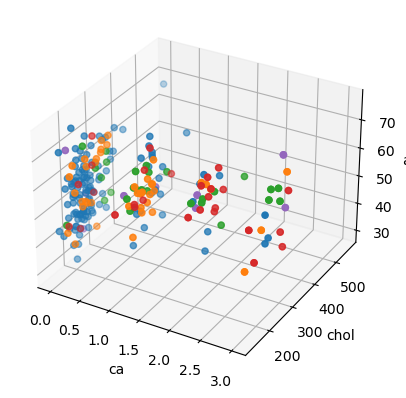

In [41]:
zero  = (y==0)
one   = (y==1)
two   = (y==2)
three = (y==3)
four  = (y==4)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X['ca'][zero],   X['chol'][zero],   X['age'][zero])
ax.scatter(X['ca'][one],   X['chol'][one],   X['age'][one])
ax.scatter(X['ca'][two],   X['chol'][two],   X['age'][two])
ax.scatter(X['ca'][three], X['chol'][three], X['age'][three])
ax.scatter(X['ca'][four],  X['chol'][four],  X['age'][four])

ax.set_xlabel('ca')
ax.set_ylabel('chol')
ax.set_zlabel('age')

# 7. References
<a id="1">[1]</a>
Anggoro, Dimas Aryo and Kurnia, Naqshauliza Devi (2020). 
Comparison of accuracy level of support vector machine (SVM) and K-nearest neighbors (KNN) algorithms in predicting heart disease
International Journal, 8(5), 1689--1694.

<a id="2">[2]</a>
https://www.kaggle.com/code/zawlinnnaing/svm-for-multiclass-classification